<a href="https://colab.research.google.com/github/paulepa7/ds-content-interactive-jupyterlab-tutorial/blob/master/waterquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
water_quality = pd.read_csv('water_potability.csv')

In [ ]:
water_quality.tail(5)

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [ ]:
print(water_quality.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
#fill missing vallues with median except the last column
imputer = SimpleImputer(strategy='median')
water_quality.iloc[:, :-1] = imputer.fit_transform(water_quality.iloc[:, :-1])

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
water_quality.iloc[:, :-1] = scaler.fit_transform(water_quality.iloc[:, :-1])

In [ ]:
#distribute the date into X and Y to create the train and testing data
X = water_quality.drop(columns=['Potability'])
y = water_quality['Potability']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

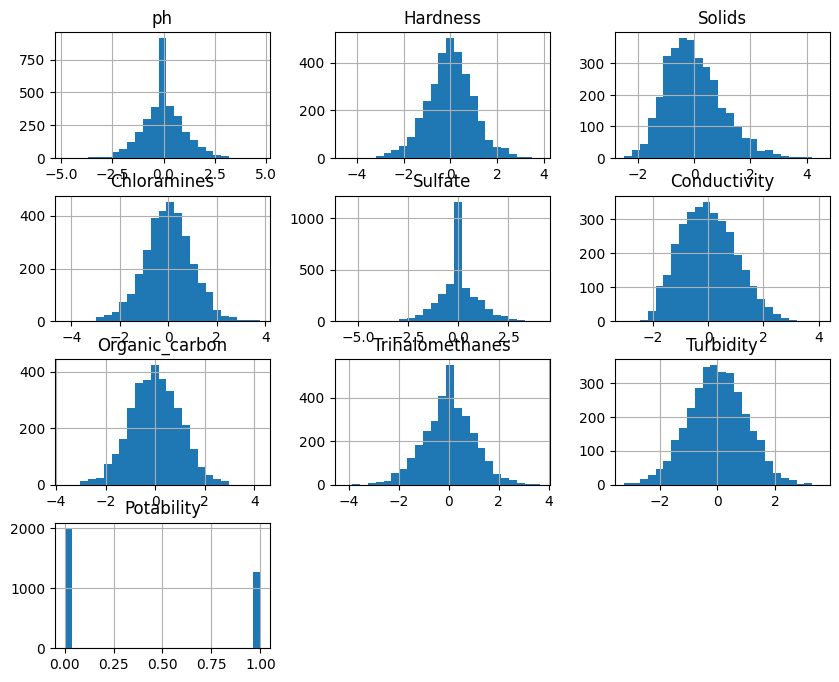

In [ ]:
water_quality.hist(figsize=(10,8), bins=25)
plt.show()

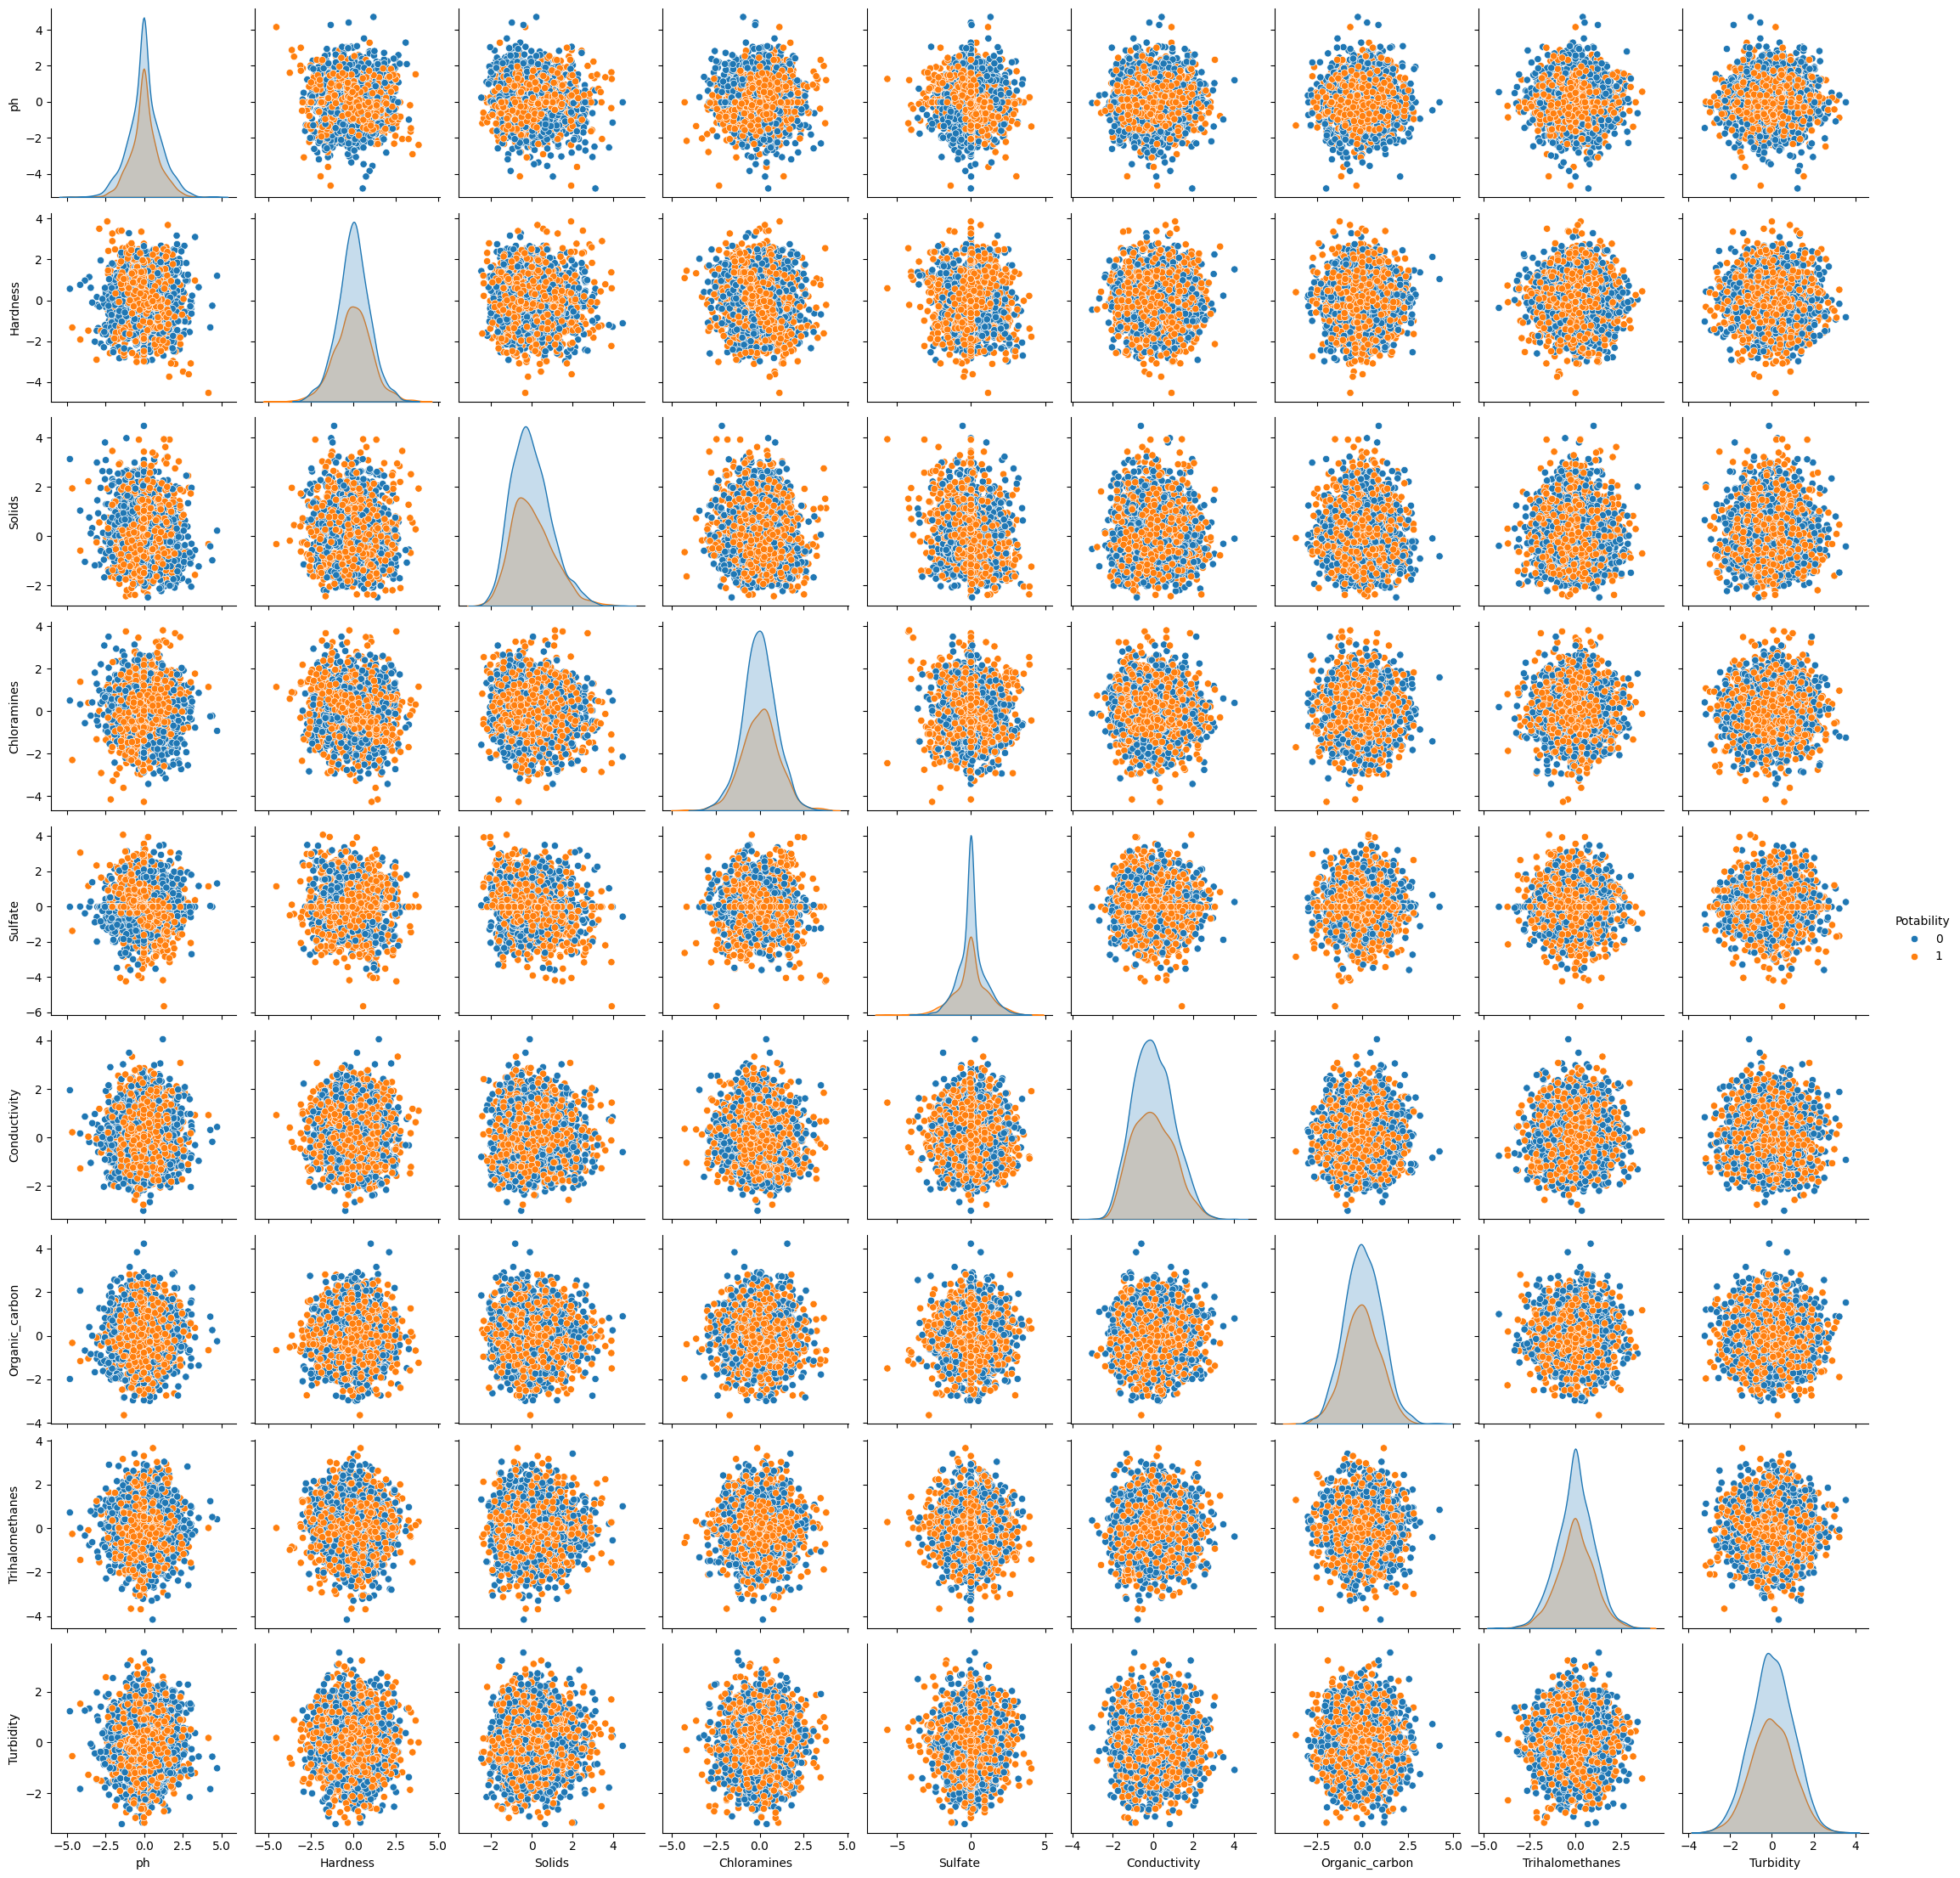

In [ ]:
sns.pairplot(water_quality, hue = 'Potability');

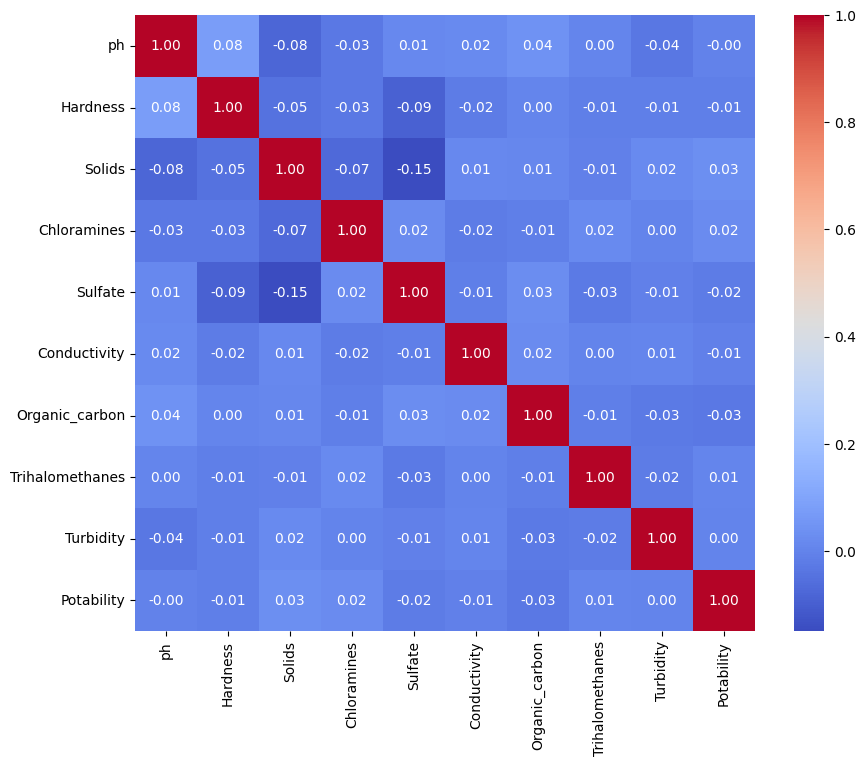

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(water_quality.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(0.3),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(1, activation='sigmoid'),
    ]
)


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
#model training
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,  callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, mode="min")
    ],
)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.5322 - loss: 0.8217 - val_accuracy: 0.6336 - val_loss: 0.6589
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5449 - loss: 0.7639 - val_accuracy: 0.6240 - val_loss: 0.6557
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5866 - loss: 0.7089 - val_accuracy: 0.6336 - val_loss: 0.6561
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5818 - loss: 0.7131 - val_accuracy: 0.6279 - val_loss: 0.6475
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6001 - loss: 0.6906 - val_accuracy: 0.6279 - val_loss: 0.6410
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6087 - loss: 0.6761 - val_accuracy: 0.6355 - val_loss: 0.6368
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6174 - loss: 0.6632 - val_accuracy: 0.6298 - val_loss: 0.6337
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6287 - loss: 0.6505 - val_accuracy: 0.6317 - 

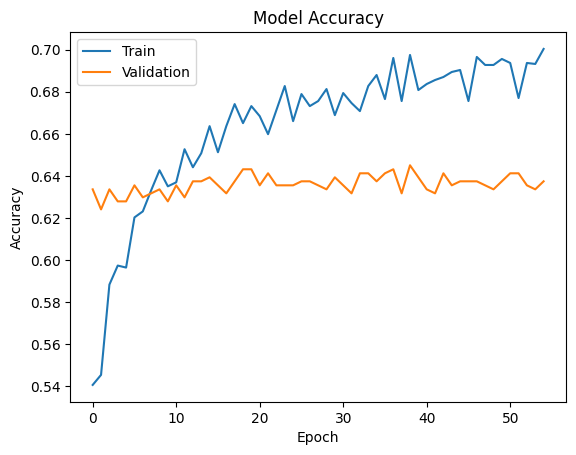

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

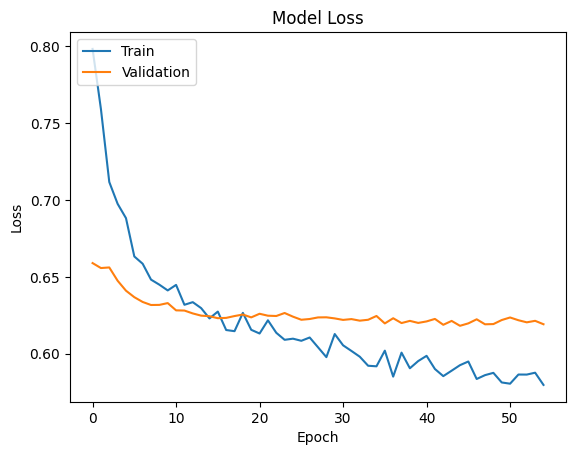

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6542 - loss: 0.6434
Test Accuracy: 0.6646


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


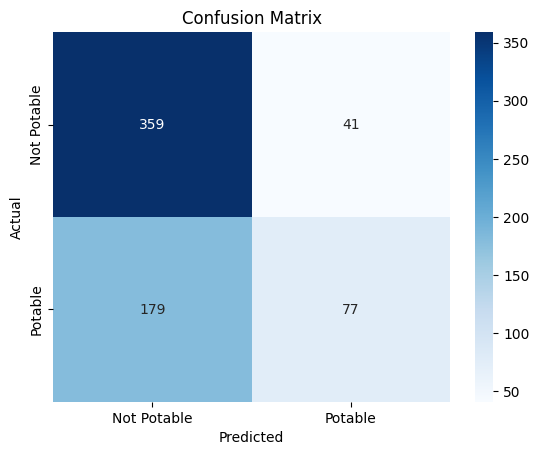

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       400
           1       0.65      0.30      0.41       256

    accuracy                           0.66       656
   macro avg       0.66      0.60      0.59       656
weighted avg       0.66      0.66      0.63       656



In [ ]:
y_predict = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap='Blues', fmt="d", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"] )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_predict))


I feel the accuracy of this model is low so i will do random forest forest and xgboost based model and then try to compare with this to see which is the best

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print(f"Random forest Accuracy: {accuracy_score(y_test, rf_preds): .4f}")

Random forest Accuracy:  0.6692


In [ ]:
#XGboost model
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_preds)}")

XGBoost Accuracy: 0.6478658536585366


Let us now do a stack prediction that will combine all the three models

In [ ]:

import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Convert predictions to NumPy arrays and flatten if necessary
rf_preds = np.array(rf_preds).flatten()
xgb_preds = np.array(xgb_preds).flatten()
y_predict = np.array(y_predict).flatten()  # Ensure NN predictions are 1D

# Stack predictions correctly
final_preds = np.vstack([rf_preds, xgb_preds, y_predict])  # Shape: (3, n_samples)
ensemble_preds = np.round(final_preds.mean(axis=0))  # Majority vote

# Evaluate performance
print(f"Ensemble Accuracy: {accuracy_score(y_test, ensemble_preds):.4f}")
print(classification_report(y_test, ensemble_preds))


Ensemble Accuracy: 0.6799
              precision    recall  f1-score   support

           0       0.68      0.90      0.77       400
           1       0.69      0.33      0.45       256

    accuracy                           0.68       656
   macro avg       0.68      0.62      0.61       656
weighted avg       0.68      0.68      0.65       656



I am now working on deploying the application

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_preds = gbc.predict(X_test)

print(f"Gradient Boost Accuracy: {accuracy_score(gbc_preds, y_test)}")

Gradient Boost Accuracy: 0.6524390243902439


In [ ]:
import joblib

joblib.dump(xgb_model, 'xgboost_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(gbc, 'gradient_boost_model.pkl')

model.save('neural_network_model.h5')

In [ ]:
# Download the model
from google.colab import files
files.download("xgboost_model.pkl")
files.download("random_forest_model.pkl")
files.download("gradient_boost_model.pkl")
files.download("neural_network_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Creating the flask application

In [ ]:
from flask import Flask, render_template, request, jsonify
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# Initialize Flask application
app = Flask(__name__)

# Load the trained models
rf_model = joblib.load('random_forest_model.pkl')
xgb_model = joblib.load('xgboost_model.pkl')
model = load_model('neural_network_model.h5')

# Route to display the input form
@app.route('/')
def index():
    return render_template('index.html')

# Route to handle the prediction
@app.route('/predict', methods=['POST'])
def predict():
    # Retrieve user inputs from the form
    pH = float(request.form['pH'])
    hardness = float(request.form['hardness'])
    solids = float(request.form['solids'])
    chloramines = float(request.form['chloramines'])
    sulfate = float(request.form['sulfate'])
    conductivity = float(request.form['conductivity'])
    organic_carbon = float(request.form['organic_carbon'])
    trihalomethanes = float(request.form['trihalomethanes'])
    turbidity = float(request.form['turbidity'])

    # Prepare the features as a numpy array
    features = np.array([pH, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity]).reshape(1, -1)

    # Make predictions using all models
    rf_pred = rf_model.predict(features)
    xgb_pred = xgb_model.predict(features)
    nn_pred = (model.predict(features) > 0.5).astype(int)

    # Combine predictions (majority voting approach)
    final_pred = np.round(np.mean([rf_pred, xgb_pred, nn_pred]))

    # Display the result on the web page
    result = 'Potable' if final_pred == 1 else 'Not Potable'

    return render_template('index.html', result=result)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
